In [15]:
import numpy as np

# Generate a random dataset with 50 samples and 2 features
np.random.seed(0)
X = np.random.randn(50, 2)


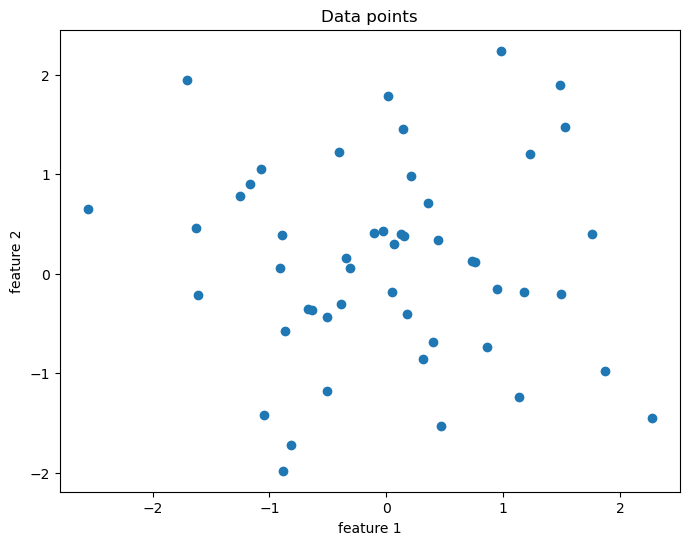

In [16]:
import matplotlib.pyplot as plt

def plot_data(X):
    # Plot the data points
    plt.figure(figsize=(8, 6))
    # put a caption on the plot
    plt.title('Data points')
    # label the x-axis
    plt.xlabel('feature 1')
    # label the y-axis
    plt.ylabel('feature 2')
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()

def plot_data_clusters(X, labels, centroids):
    # Plot the data points and their assigned labels
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x')
    plt.show()


plot_data(X)

[2 1 2 2 1 1 2 1 2 2 0 2 2 2 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 2 0 0 2 2
 2 0 0 0 2 1 2 1 1 1 1 1 1]


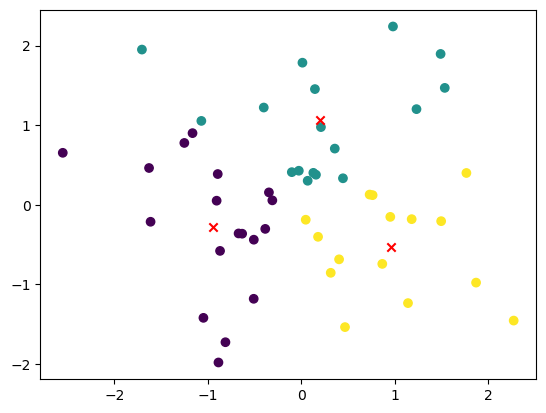

In [17]:
from scipy.cluster.vq import kmeans, vq

# Specify the number of clusters
k = 3

# Perform k-means clustering on the dataset
centroids, _ = kmeans(X, k)

# Assign each data point to a cluster
labels, _ = vq(X, centroids)

# Print the assigned labels
print(labels)

plot_data_clusters(X, labels, centroids)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 1 0 0 0 1 1 0 0 0 0]


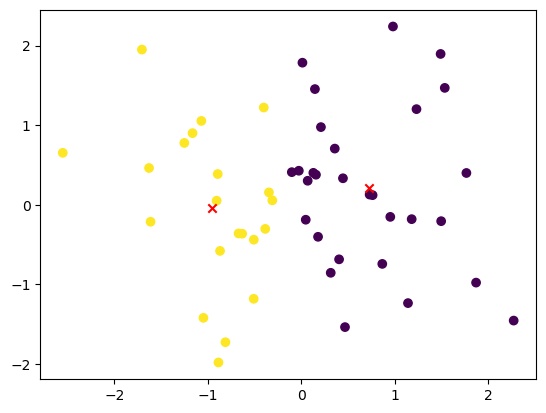

In [19]:
# Specify the number of clusters
k = 2

# Perform k-means clustering on the dataset
centroids, _ = kmeans(X, k)

# Assign each data point to a cluster
labels, _ = vq(X, centroids)

# Print the assigned labels
print(labels)

plot_data_clusters(X, labels, centroids)


In [20]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Evaluate the clustering results using the Silhouette score
silhouette_score = silhouette_score(X, labels)
print(f'Silhouette score: {silhouette_score:.2f}')

# Evaluate the clustering results using the Calinski-Harabasz index
calinski_harabasz_score = calinski_harabasz_score(X, labels)
print(f'Calinski-Harabasz index: {calinski_harabasz_score:.2f}')


Silhouette score: 0.31
Calinski-Harabasz index: 25.77


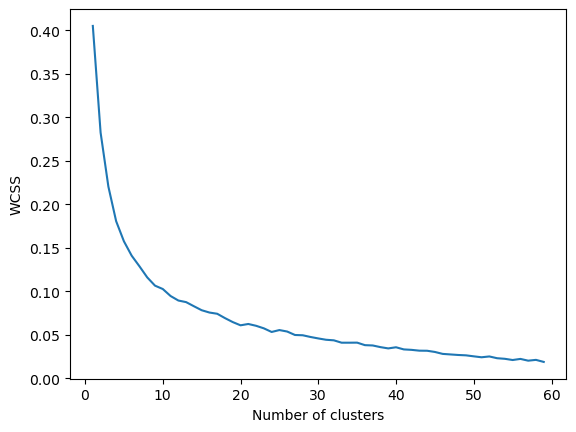

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

# Generate a random dataset
np.random.seed(62)
X = np.random.rand(100, 2)

# Compute the WCSS for different numbers of clusters
wcss = []
for k in range(1, 60):
    centroids, distortion = kmeans(X, k)
    wcss.append(distortion)

# Plot the WCSS vs. the number of clusters
plt.plot(range(1, 60), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


[1 2 2 2 0 2 2 2 0 1 0 2 2 1 1 1 2 1 0 2 2 1 1 0 0 1 0 0 2 2 1 1 2 2 1 2 2
 0 1 0 0 0 2 2 0 2 2 0 2 1 0 2 2 0 1 2 0 2 0 2 1 1 0 1 0 2 0 2 2 1 0 0 2 2
 0 1 1 0 1 0 1 1 0 2 0 2 0 2 0 2 1 0 1 2 2 2 0 0 0 1]


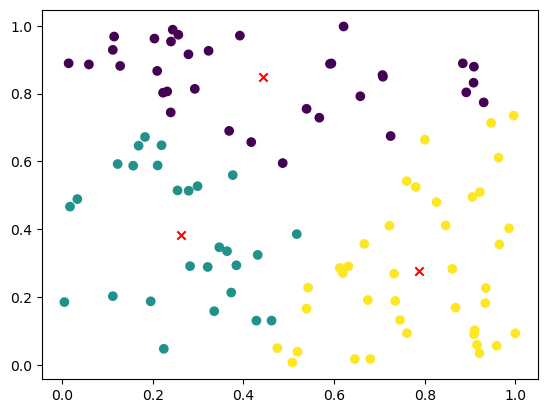

In [22]:
import numpy as np
from scipy.spatial.distance import cdist

def kmeans_basic(X, k, max_iter=100):
    # Initialize the centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    
    for i in range(max_iter):
        # Assign each data point to the nearest centroid
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)
        
        # Update the centroids
        for j in range(k):
            centroids[j] = np.mean(X[labels == j, :], axis=0)
    
    return labels, centroids

labels, centroids = kmeans_basic(X, k=3)
print(labels)

plot_data_clusters(X, labels, centroids)

In [23]:
from scipy.spatial.distance import cdist

def mean_distance_similarity(X, labels):
    # Compute the mean distance between elements in each cluster
    distances = cdist(X, X)
    similarity = 0
    for i in np.unique(labels):
        cluster_distances = distances[labels == i, :][:, labels == i]
        similarity += np.mean(cluster_distances)
    
    # Normalize the similarity by the number of clusters
    similarity /= len(np.unique(labels))
    
    return similarity

# Compute the mean distance similarity
mean_distance_similarity = mean_distance_similarity(X, labels)
print(f'Mean distance similarity: {mean_distance_similarity:.2f}')



Mean distance similarity: 0.32


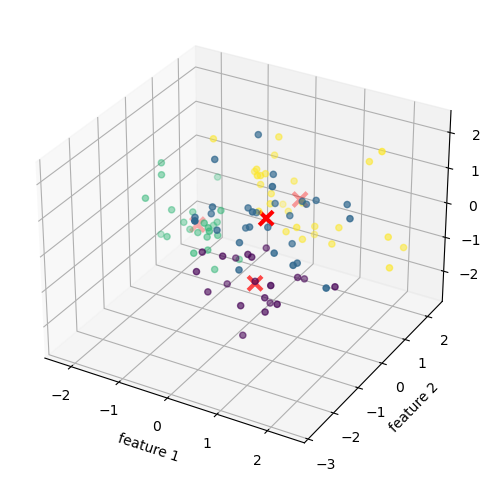

In [24]:
# Exercise 1
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.vq import kmeans, vq

# Generate a random dataset with 100 samples and 3 features
np.random.seed(0)
X = np.random.randn(100, 3)

def plot_data_1(X):
    plt.figure(figsize=(8, 6))
    plt.title('Data points')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()

def plot_data_2(X):
    plt.figure(figsize=(8, 6))
    plt.title('Data points')
    plt.xlabel('feature 2')
    plt.ylabel('feature 3')
    plt.scatter(X[:, 1], X[:, 2])
    plt.show()

def plot_data_clusters(X, labels, centroids):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, marker='o')
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='r', marker='x', s=100, linewidths=3)
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    ax.set_zlabel('feature 3')
    plt.show()
    
k = 4
centroids, _ = kmeans(X, k)
labels, _ = vq(X, centroids)

plot_data_clusters(X, labels, centroids)


In [25]:
# Exercise 2

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

n_clusters = 4

manhattan_distances = pairwise_distances(X, metric='cityblock')

euclidean_kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
euclidean_kmeans.fit(X)

euclidean_silhouette_score = silhouette_score(X, euclidean_kmeans.labels_)
euclidean_calinski_harabasz_score = calinski_harabasz_score(X, euclidean_kmeans.labels_)

manhattan_kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
manhattan_kmeans.fit(manhattan_distances)

manhattan_silhouette_score = silhouette_score(X, manhattan_kmeans.labels_)
manhattan_calinski_harabasz_score = calinski_harabasz_score(X, manhattan_kmeans.labels_)

print(f"Euclidean Silhouette score: {euclidean_silhouette_score:.3f}")
print(f"Manhattan Silhouette score: {manhattan_silhouette_score:.3f}")

print(f"Euclidean Calinski-Harabasz index: {euclidean_calinski_harabasz_score:.3f}")
print(f"Manhattan Calinski-Harabasz index: {manhattan_calinski_harabasz_score:.3f}")

C:\Users\bloo404\anaconda3\envs\nou\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bloo404\anaconda3\envs\nou\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Euclidean Silhouette score: 0.262
Manhattan Silhouette score: 0.209
Euclidean Calinski-Harabasz index: 37.949
Manhattan Calinski-Harabasz index: 25.618


C:\Users\bloo404\anaconda3\envs\nou\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bloo404\anaconda3\envs\nou\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\bloo404\anaconda3\envs\nou\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bloo404\anaconda3\envs\nou\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

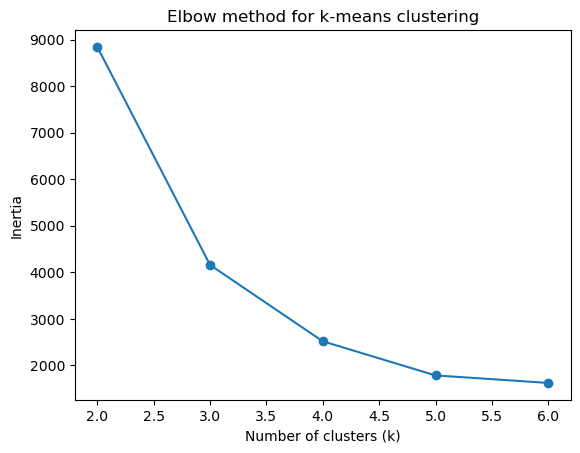

In [26]:
#Exercise 3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=0)

k_values = range(2, 7)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method for k-means clustering')
plt.show()

C:\Users\bloo404\anaconda3\envs\nou\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bloo404\anaconda3\envs\nou\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


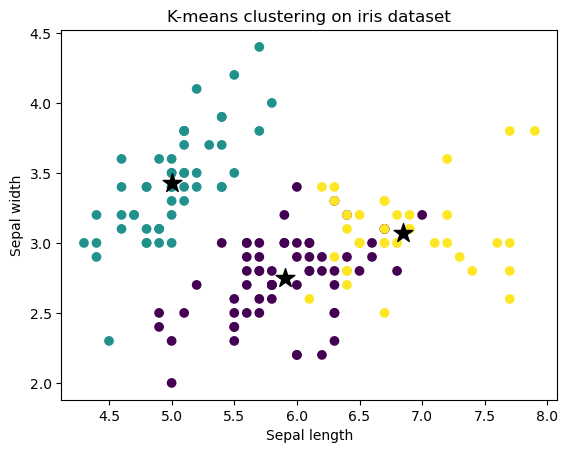

Silhouette score: 0.553
Calinski-Harabasz index: 561.628


In [27]:
#Exercise 4

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, calinski_harabasz_score

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, color='black')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.title('K-means clustering on iris dataset')
plt.show()

silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette score: {silhouette_avg:.3f}")

calinski_harabasz_avg = calinski_harabasz_score(X, kmeans.labels_)
print(f"Calinski-Harabasz index: {calinski_harabasz_avg:.3f}")